# **Credit card customers' churn**
### **Author: Davy SIMEU**

## Context

A banking institution is suffering a decline in revenue due to heavy attrition of credit card users.

Now the institution wants to analyze data in order to understand the phenomenon and predict customers who are likely to drop off.

Our intent is to provide some answers to the problem above by predicting attrition using the given dataset.

<img src="images/details1.png" alt="image" width="700"/>

<img src="images/details2.png" alt="image" width="700"/>

<img src="images/details3.png" alt="image" width="700"/>

---

## Exploratory data analysis

### Import packages

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations, product
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline
sns.set_style('darkgrid')

### Loading data with Pandas

We need to load `client_data.csv` into a dataframe so that we can work with it in Python

In [2]:
df = pd.read_csv('client_data.csv')

Let's look at the first 5 rows of the dataframe to see what the data looks like

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


And last 5 rows...

In [4]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


We can see there is a mix of numeric and categorical data, which we will have to transform before modelling later

### Data types

It is useful to first understand the data that we're dealing with, along with the data types of each column. The data types may dictate how we transform and engineer features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Now let's have a look to some statistics about the dataset

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


The describe method gives us a lot of information about the client data. The key point to take away from this is that oveall the data looks good.

In [7]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Hopefully, there **NO** missing values in the whole dataset. This means we do not have to worry about handling it. :)

### Data visualization

Now let's dive a bit deeper into the data

#### Churn

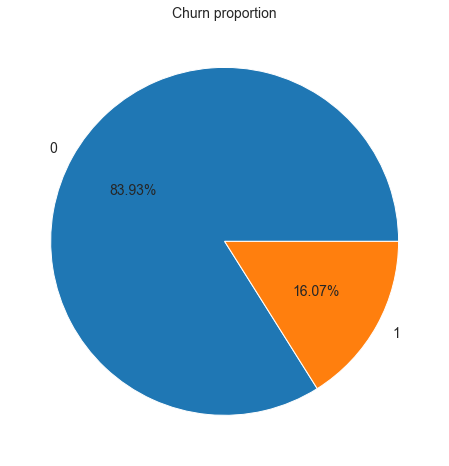

In [48]:
plt.figure(figsize=(8,8))
df['Attrition_Flag'].value_counts().plot(kind='pie', fontsize=14, autopct='%.2f%%')
plt.ylabel('')
plt.title('Churn proportion', size=14)
plt.show()

There is class imbalance in the dataset (**THIS IS NO SURPRISE!**): the number of clients who have churned is $5$ times less than the one of existing clients.

About $16\%$ of the total customers have churned. (This sounds about right)

A little feature engineering

In [9]:
df.drop(columns='CLIENTNUM', inplace=True) # We drop this column because it has no predictive power whatsoever

# ML models don't know how to handle non-numerical data, hence we turn those categorical variables into numeric (since there are only two possible values per variable)
df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1}, inplace=True) 
df['Gender'].replace({'M':0, 'F':1}, inplace=True)

#### Distribution of numeric variables (with churn information)

In [10]:
def plot_distribution(dataframe, column, ax):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["Attrition_Flag"]==0][column],
    "Churn":dataframe[dataframe["Attrition_Flag"]==1][column]})
    # Plot the histogram
    temp[["Retention", "Churn"]].plot(kind='hist', ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

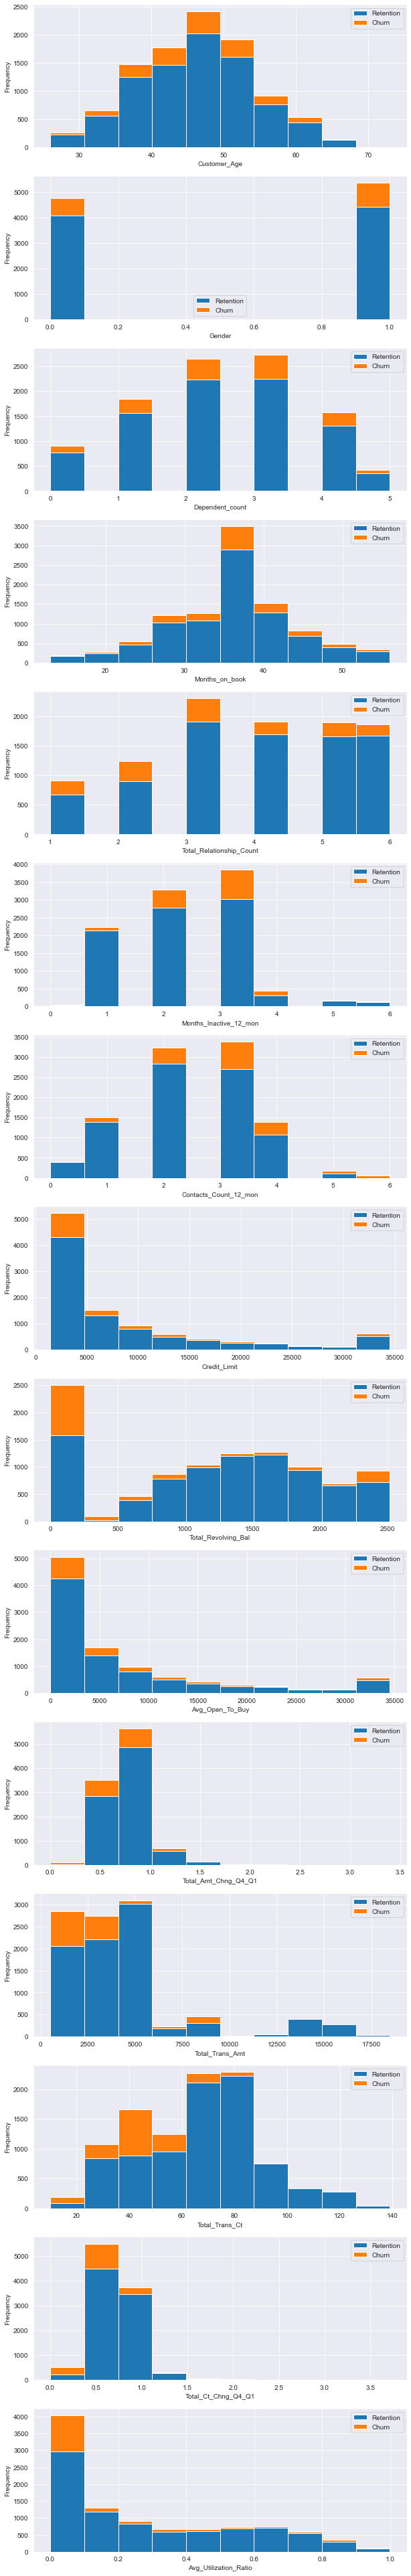

In [21]:
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Attrition_Flag')
fig, axs = plt.subplots(nrows=len(num_cols), figsize=(10, 70))
for i, el in enumerate(num_cols): 
    plot_distribution(df, el, axs[i])

#### Distribution of categorical variables (with churn information)

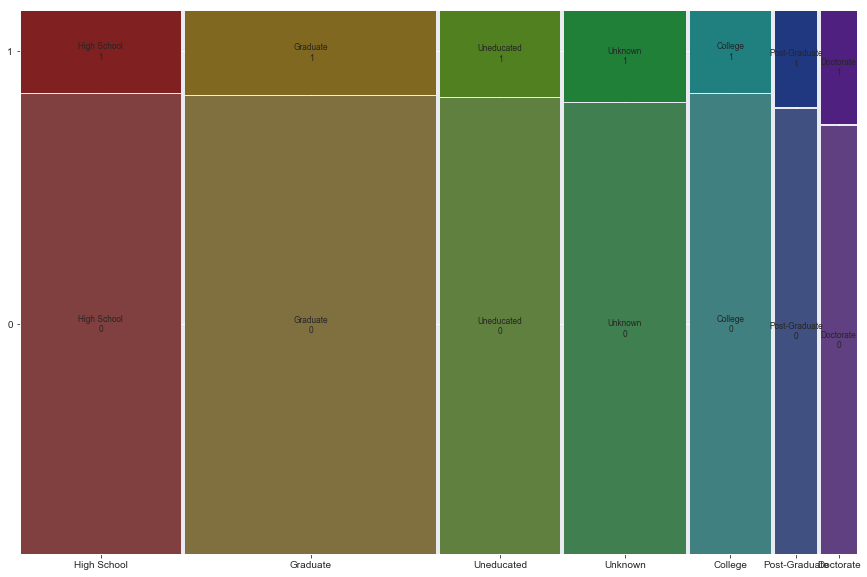

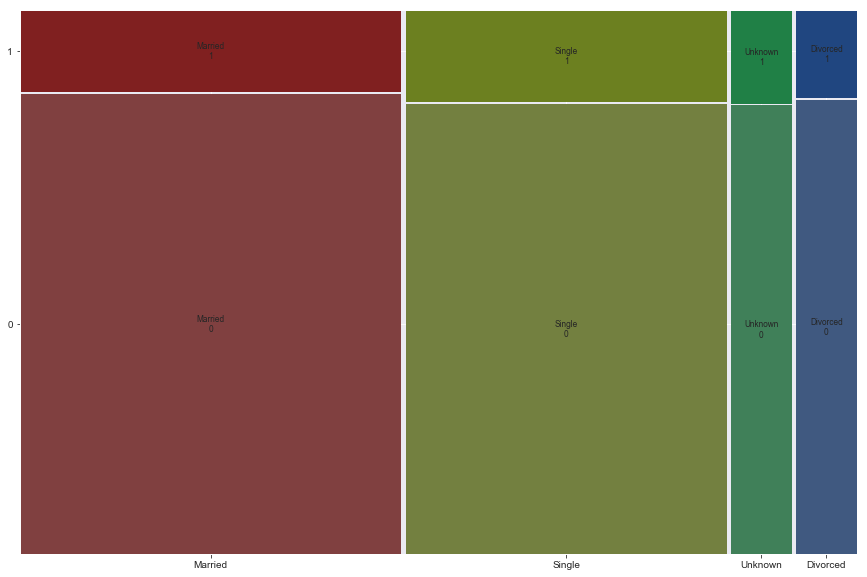

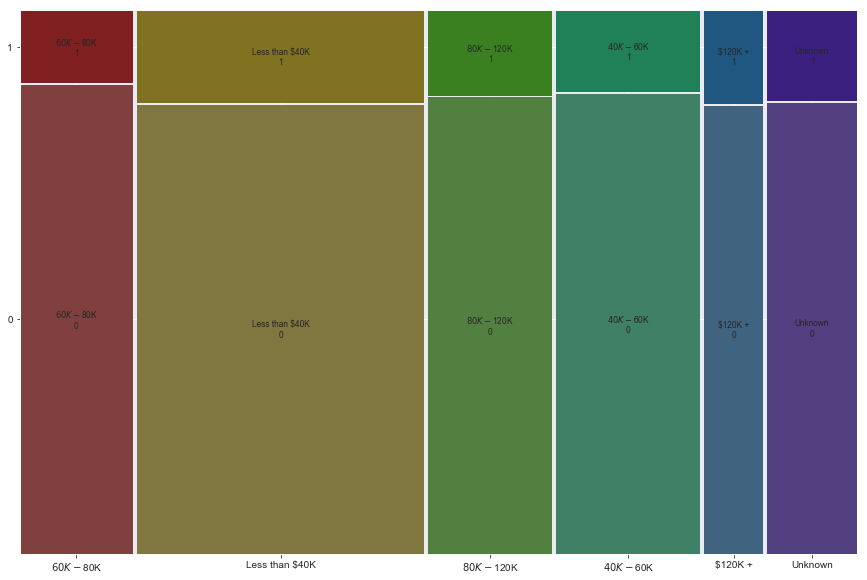

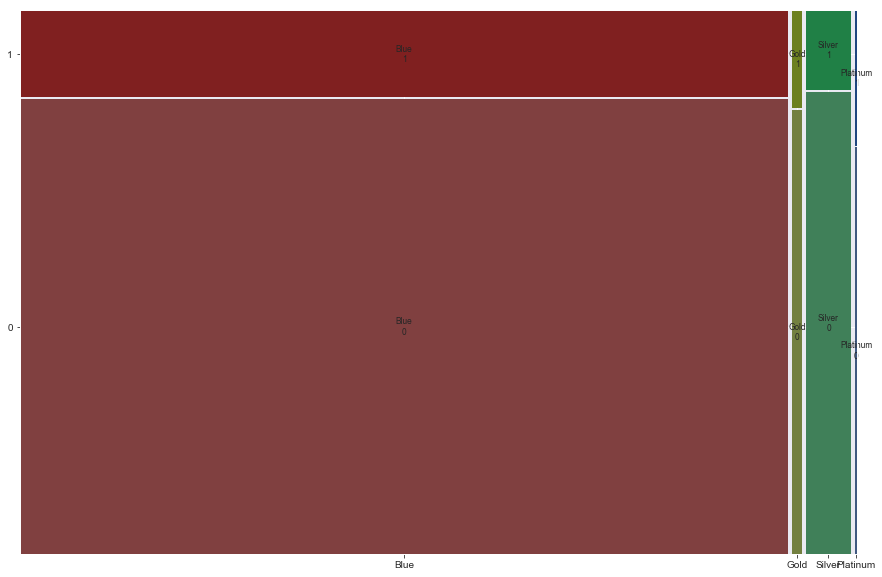

In [47]:
ctg_cols = df.select_dtypes(include='object').columns.tolist()
prods = product(ctg_cols, ['Attrition_Flag'])

for el in prods:
    _, ax = plt.subplots(figsize=(15,10))
    mosaic(df, list(el), ax=ax)

#### Categorical variables repartition

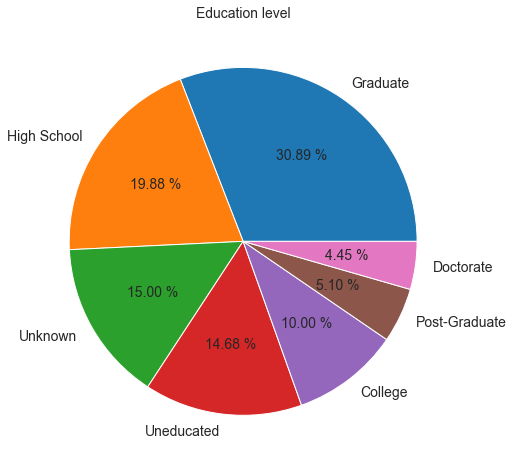

In [49]:
plt.figure(figsize=(8,8))
df['Education_Level'].value_counts().plot(kind='pie', fontsize=14, autopct='%.2f %%')
plt.ylabel('')
plt.title('Education level', size=14)
plt.show()

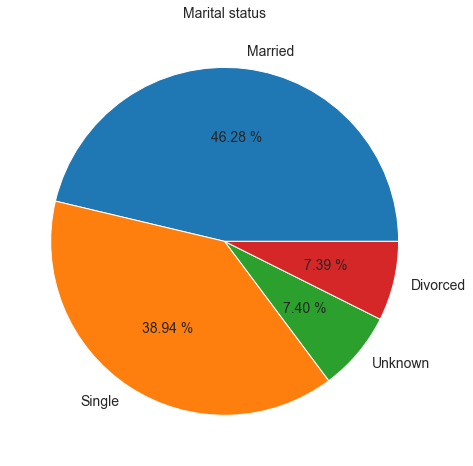

In [50]:
plt.figure(figsize=(8,8))
df['Marital_Status'].value_counts().plot(kind='pie', fontsize=14, autopct='%.2f %%')
plt.ylabel('')
plt.title('Marital status', size=14)
plt.show()

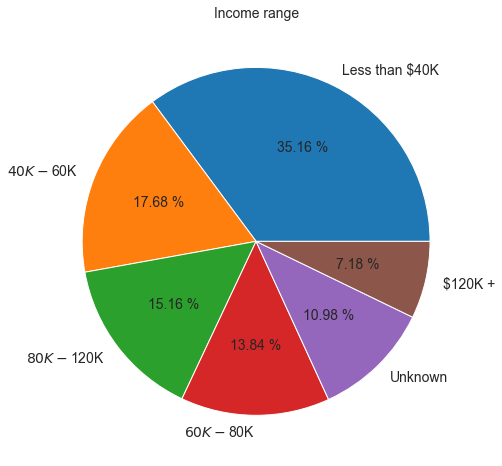

In [51]:
plt.figure(figsize=(8,8))
df['Income_Category'].value_counts().plot(kind='pie', fontsize=14, autopct='%.2f %%')
plt.ylabel('')
plt.title('Income range', size=14)
plt.show()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


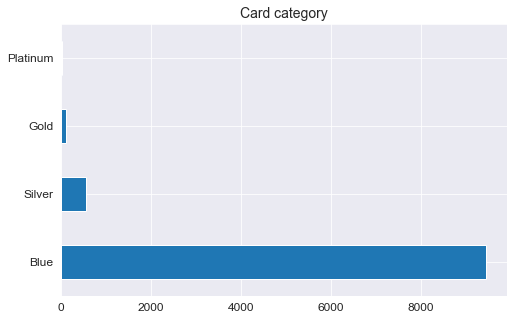

In [52]:
counts = df['Card_Category'].value_counts()
print(counts)
plt.figure(figsize=(8,5))
counts.plot(kind='barh', fontsize=12)
plt.title('Card category', size=14)
plt.show()

In [53]:
# _, axs = plt.subplots(int(len(num_cols)/3)+1, 3, figsize=(16,24))
# i=0
# for el in num_cols:
#     sns.histplot(df[el],ax=axs[i//3 if i//3 else 0][i%3 if i%3 else 0])
#     i+=1
# plt.tight_layout()
# plt.show()

In [54]:
num_cols

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [14]:
cat_dummies = pd.get_dummies(df[ctg_cols])
df_ = pd.concat([df.drop(columns=ctg_cols), cat_dummies], axis=1)
df_.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


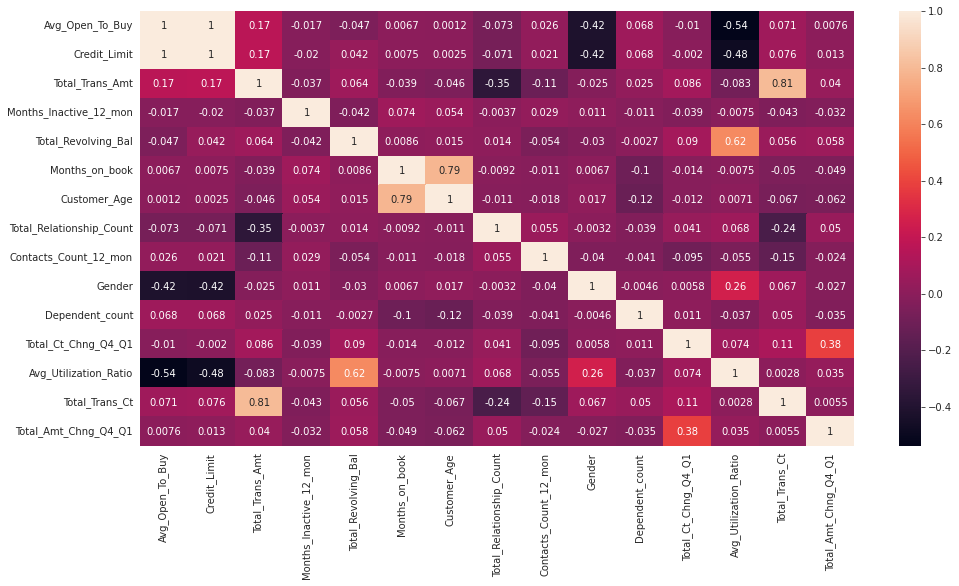

In [15]:
corr_matrix = df_[num_cols].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, vmax=1.0, annot=True)
plt.show()

In [16]:
X = df_.drop(['Attrition_Flag'], axis=1).copy()
y = df_['Attrition_Flag'].copy()

In [17]:
sum(y)/len(y)

0.1606596227905599

In [18]:
corr_features = set()
for i in range(len(corr_matrix)):
  for j in range(i):
    if abs(corr_matrix.iloc[i,j]) > .75:
      corr_features.add(corr_matrix.columns[i])
corr_features = list(corr_features)

In [19]:
corr_features

['Credit_Limit', 'Total_Trans_Ct', 'Customer_Age']

# Implementation of Machine Learning algorithms

In [20]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=101)

In [22]:
print(sum(y_train)/len(y_train), sum(y_test)/len(y_test))

0.16063199473337722 0.16074249605055294


In [23]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [24]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred1 = clf_log.predict(X_test)
roc_auc_score(y_test, y_pred1)

0.7802520595461772

In [32]:
pd.DataFrame(confusion_matrix(y_test, y_pred1))

,0,1
0,2063,62
1,167,240


In [25]:
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
y_pred = clf_rf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.8923873392108688

In [27]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,2101,24
1,83,324


In [28]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2125
           1       0.93      0.80      0.86       407

    accuracy                           0.96      2532
   macro avg       0.95      0.89      0.92      2532
weighted avg       0.96      0.96      0.96      2532



precision = TP/(TP+TN)
recall = TP/(TP+FN)

In [29]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=45)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.740568
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.771966
[2]	validation_0-aucpr:0.776821
[3]	validation_0-aucpr:0.793409
[4]	validation_0-aucpr:0.816267
[5]	validation_0-aucpr:0.83547
[6]	validation_0-aucpr:0.836064
[7]	validation_0-aucpr:0.851364
[8]	validation_0-aucpr:0.853534
[9]	validation_0-aucpr:0.859509
[10]	validation_0-aucpr:0.86797
[11]	validation_0-aucpr:0.871135
[12]	validation_0-aucpr:0.873085
[13]	validation_0-aucpr:0.877198
[14]	validation_0-aucpr:0.880443
[15]	validation_0-aucpr:0.881306
[16]	validation_0-aucpr:0.883001
[17]	validation_0-aucpr:0.88379
[18]	validation_0-aucpr:0.887717
[19]	validation_0-aucpr:0.891813
[20]	validation_0-aucpr:0.891299
[21]	validation_0-aucpr:0.892035
[22]	validation_0-aucpr:0.897116
[23]	validation_0-aucpr:0.90154
[24]	validation_0-aucpr:0.903024
[25]	validation_0-aucpr:0.90523
[26]	validation_0-aucpr:0.906702
[27]	validation_0-aucpr:0.906403
[28]	validation_0-aucpr:0

XGBClassifier(seed=45)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


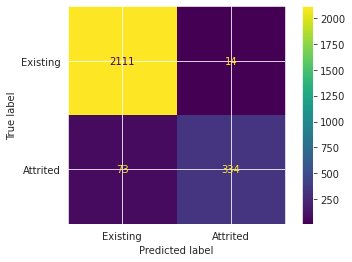

In [30]:
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=['Existing', 'Attrited'])
plt.show()

# Next steps

- Try out other models to perform this binary classification
- Apply dimension reduction (forward, backward, RFE) to reduce the number of features used as predictors for the attrition flag
- Leverage K-fold CV to refine the hyperparameters of models having one, like XGBoost classifier